In [101]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords

from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, SGDClassifier

import matplotlib
import matplotlib.patches as mpatches



In [102]:
df = pd.read_csv('salary_df.csv')

In [103]:
df = df.drop('Unnamed: 0',axis = 1)

In [104]:
df['Salary_Bins'].unique()

array([2, 1, 0, 3, 4], dtype=int64)

In [105]:
df

,titles,reviews,Paid Rate,avg_salary,City,is_city,combined_text,Salary_Bins
0,CAD Customization,3.6,Yearly,550000.0,Chennai,1,cad customization description 1 hands on exp...,2
1,Advisor-Data Science,4.3,Yearly,500000.0,Bengaluru,1,"advisor data science as a data scientist, you ...",1
2,AI/ML Engineering Intern,NaN,Monthly,240000.0,Other,0,"ai ml engineering intern at lizmotors, we're a...",0
3,Senior Advisor - Machine Learning Engineer,4.3,Yearly,750000.0,Bengaluru,1,senior advisor machine learning engineer dat...,3
4,Data Science Consultant- AI Product Manager,4.3,Yearly,700000.0,Bengaluru,1,data science consultant ai product manager da...,2
...,...,...,...,...,...,...,...,...
1866,Android Developer,NaN,Yearly,450000.0,Ahmedabad,1,android developer about the role developing ap...,1
1867,Product Innovation Lead,NaN,Yearly,550000.0,Thiruvananthapuram,1,product innovation lead position name product...,2
1868,Senior Software Engineer,NaN,Monthly,150000.0,Bengaluru,1,senior software engineer please note the follo...,0
1869,Sr Power Bi Support Engineer,NaN,Yearly,1100000.0,Pune,1,sr power bi support engineer responsibilities ...,4


In [106]:
def process_words(job_descriptions):
    jd_data=[]
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    stopwords_list += list(string.ascii_lowercase)
    wnl = WordNetLemmatizer()
    
    for jd in job_descriptions:
        jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
        jd_tokens=[word.lower() for word in jd_tokens_raw]
        jd_words_stopped = [wnl.lemmatize(word) for word in jd_tokens if word not in stopwords_list]
        jd_data.append(jd_words_stopped)
    return pd.Series(jd_data)

In [107]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sendh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sendh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [108]:
text = process_words(df['combined_text']).map(' '.join)

In [109]:
text

0       cad customization description hand expertise d...
1       advisor data science data scientist crucial ro...
2       ai ml engineering intern lizmotors we're foref...
3       senior advisor machine learning engineer data ...
4       data science consultant ai product manager dat...
                              ...                        
1866    android developer role developing app function...
1867    product innovation lead position name product ...
1868    senior software engineer please note following...
1869    sr power bi support engineer responsibility mo...
1870    intern qa engineer r month minimum year commit...
Length: 1871, dtype: object

In [110]:
def cv(data):
    count_vect = CountVectorizer(max_df=0.5, min_df=0.01, ngram_range=(1,3), stop_words='english')
    embd = count_vect.fit_transform(data)
    return embd,count_vect
    
    

In [111]:
X_train,X_test,y_train,y_test = train_test_split(text,df['Salary_Bins'],test_size = 0.2,shuffle=True)

In [112]:

x_train,count_vect = cv(X_train)
x_test = count_vect.transform(X_test)


In [113]:
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
       
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','green','red','pink']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            a = mpatches.Patch(color='orange', label='0-3L')
            b = mpatches.Patch(color='blue', label='3-5L')
            c = mpatches.Patch(color='green', label='5-7L')

            plt.legend(handles=[a,b,c], prop={'size': 10})

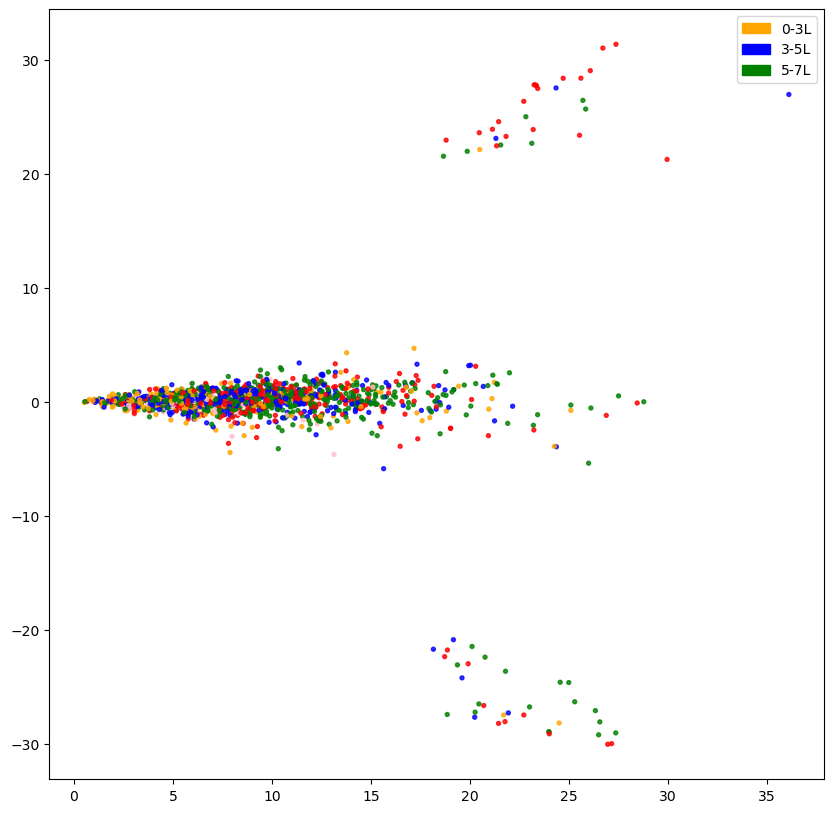

In [114]:
fig = plt.figure(figsize=(10, 10))          
plot_LSA(x_train, y_train)
plt.show()

In [115]:
cv  = CountVectorizer(max_df=0.5, min_df=0.01, ngram_range=(1,2),stop_words='english')
lg = LogisticRegression(class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
skf = StratifiedKFold(n_splits=5)
params = {'countvectorizer__max_df':np.linspace(0.2,0.4,5),'countvectorizer__min_df':[0.01,0.02],'logisticregression__C':
          np.linspace(0.05,0.15,5)}
pipe = make_pipeline(CountVectorizer(max_df=0.5, min_df=0.01, ngram_range=(1,3),stop_words='english'),LogisticRegression(class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial',  random_state=40))
grid = GridSearchCV(pipe,params,scoring="accuracy",n_jobs=-1,verbose=1)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\sendh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(

KeyboardInterrupt



In [ ]:
grid.best_score_,grid.best_params_

In [ ]:
pipe = make_pipeline(CountVectorizer(max_df=0.2, min_df=0.01, ngram_range=(1,3),stop_words='english'),LogisticRegression(class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial',  random_state=40,C=0.075))
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
skf = StratifiedKFold(n_splits=5)

clf = LogisticRegressionCV(Cs=np.linspace(0.1,1,10), cv = skf, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
clf.scores_

In [ ]:
plt.plot(np.linspace(0.1,1,10), np.mean(clf.scores_[4], axis=0))
plt.xlabel("C")
plt.ylabel("Mean CV-accuracy");

In [ ]:
clf = LogisticRegression(C=0.47,  class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
 accuracy = accuracy_score(y_test, y_pred)

In [ ]:
accuracy

In [ ]:
np.linspace(-10,60,30)

In [ ]:
len(count_vect.vocabulary_)

In [116]:
def tfidf(data):
    tfidf_vect = TfidfVectorizer(max_df=0.3, min_df=0.05, ngram_range=(1,3), stop_words='english')
    embd = tfidf_vect.fit_transform(data)
    return embd,tfidf_vect

In [117]:
x_train,tfidf_vect = tfidf(X_train)
x_test = tfidf_vect.transform(X_test)

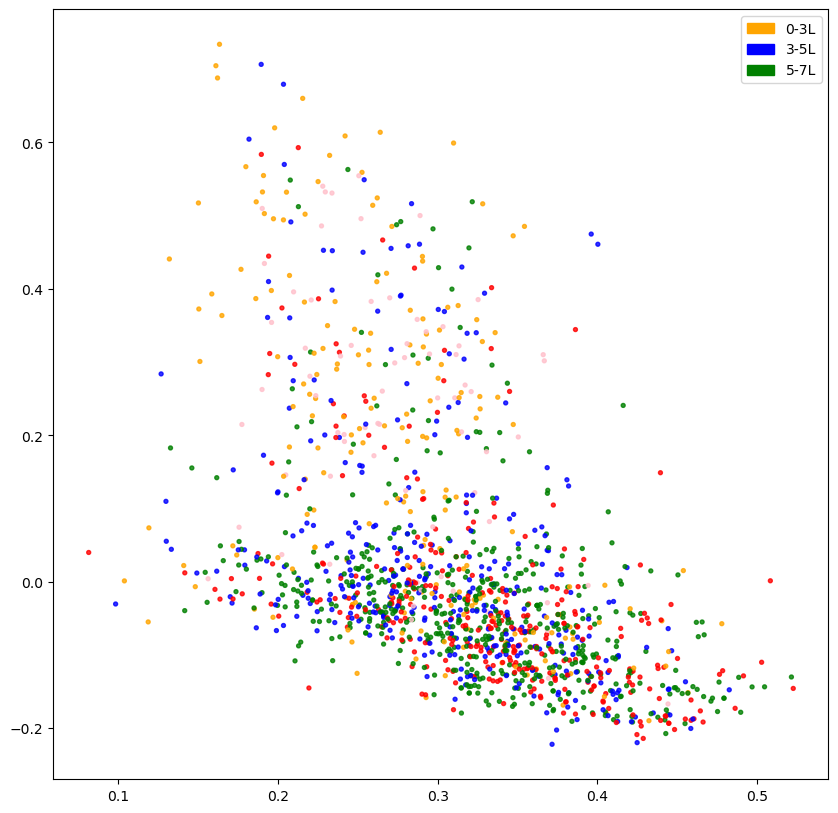

In [118]:
fig = plt.figure(figsize=(10, 10))          
plot_LSA(x_train, y_train)
plt.show()

In [119]:
lsa = TruncatedSVD(n_components=2)
lsa.fit(x_train)
lsa_scores = lsa.transform(x_train)
df.iloc[X_train[lsa_scores[:,1]> 0.4].index]



,titles,reviews,Paid Rate,avg_salary,City,is_city,combined_text,Salary_Bins
569,Data Analyst,NaN,Monthly,288000.0,Raigarh,1,data analyst i need best employee my company p...,0
463,Data Scientist,NaN,Yearly,1050000.0,Pune,1,data scientist about company at talent quotie...,4
1810,Senior Data Engineer,NaN,Yearly,2250000.0,Other,0,senior data engineer we are hiring experienced...,4
1432,Azure Data Engineer,NaN,Yearly,2270500.0,Bengaluru,1,azure data engineer 8 years of experience in ...,4
189,Sr. Python Developer,4.0,Monthly,462000.0,Chandigarh,1,sr python developer company description trick...,1
...,...,...,...,...,...,...,...,...
610,Software Business Analyst,4.5,Monthly,570000.0,Other,0,software business analyst note please do not ...,2
1387,Field Engineer,NaN,Monthly,144000.0,Mumbai,1,field engineer gps device services and install...,0
1154,Data Analyst,NaN,Yearly,250000.0,Hyderabad,1,data analyst the data analystis the custodian ...,0
1352,Software Developer,NaN,Yearly,700000.0,Bengaluru,1,software developer software engineer required ...,2


In [120]:

skf = StratifiedKFold(n_splits=5)
params = {'countvectorizer__max_df':[0.1],
          'countvectorizer__min_df':[0.005],
          'tfidftransformer__norm':[None],
          'tfidftransformer__use_idf':[True],
          'tfidftransformer__smooth_idf':[True],
          'logisticregression__C':[1,2,3,4,5]}
pipe = make_pipeline(CountVectorizer(ngram_range=(1,3),stop_words='english'),TfidfTransformer(),LogisticRegression(class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial',  random_state=40))
grid = GridSearchCV(pipe,params,scoring="accuracy",cv = skf,n_jobs=-1,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('tfidftransformer', TfidfTransformer()),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           multi_class='multinomial',
                                                           random_state=40,
                                                           solver='newton-cg'))]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_df': [0.1],
                         'countvectorizer__min_df': [0.005],
                         'logisticregression__C': [1, 2, 3, 4, 5],
                         'tfidftransformer__norm': [None],
                         'tfidftransformer__smooth_idf': [True],
                         'tfidftransformer__use_idf': [True]},
             scoring='accuracy', verbose=1)

In [100]:
grid.best_score_,grid.best_params_

(0.33741496598639453,
 {'countvectorizer__max_df': 0.1,
  'countvectorizer__min_df': 0.005,
  'logisticregression__C': 2,
  'tfidftransformer__norm': None,
  'tfidftransformer__smooth_idf': True,
  'tfidftransformer__use_idf': True})

In [ ]:
pipe = make_pipeline(CountVectorizer(max_df=0.37, min_df=0.005, ngram_range=(1,3),stop_words='english'),TfidfTransformer(),LogisticRegression(class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial',  random_state=40,C=0.01))
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

In [ ]:
'''(0.4552196209587514,
 {'countvectorizer__max_df': 0.37499999999999994,
  'countvectorizer__min_df': 0.005,
  'logisticregression__C': 0.01,
  'tfidftransformer__norm': None,
  'tfidftransformer__smooth_idf': True,
  'tfidftransformer__use_idf': True})
(0.454546265328874,
 {'countvectorizer__max_df': 0.55,
  'countvectorizer__min_df': 0.01,
  'logisticregression__C': 0.05,
  'tfidftransformer__norm': None,
  'tfidftransformer__smooth_idf': True,
  'tfidftransformer__use_idf': True}) '''

In [ ]:
x_train[[1,2,3,4]]

In [ ]:
x_train[next(skf.split(X_train,y_train))[0]]

# Random Forest Classifier


### n_estimators parameter tuning


In [ ]:

x_train,tfidf_vect = tfidf(X_train)
x_test = tfidf_vect.transform(X_test)
temp_train_acc = []
temp_test_acc = []
train_acc = []
test_acc = []
max_n_estimators = [10,20,30,40,50,70,100,120,130,140]
skf = StratifiedKFold(n_splits=5,shuffle=True)

for estimators in max_n_estimators:
    temp_test_acc = []
    temp_train_acc = []
    rf = RandomForestClassifier(n_estimators=estimators,n_jobs=-1,random_state=40)
    for train,test in skf.split(x_train,y_train):
        xtrain,xtest = x_train[train],x_train[test]
        ytrain,ytest = y_train.iloc[train],y_train.iloc[test]
        rf.fit(xtrain,ytrain)
        temp_train_acc.append(rf.score(xtrain,ytrain))
        temp_test_acc.append(rf.score(xtest,ytest))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
        
    

In [ ]:
#np.asarray(test_acc).mean(axis=1)
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best CV accuracy is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100,
                                                       max_n_estimators[np.argmax(test_acc.mean(axis=1))]))

Best CV accuracy is 34.39% with 100 trees


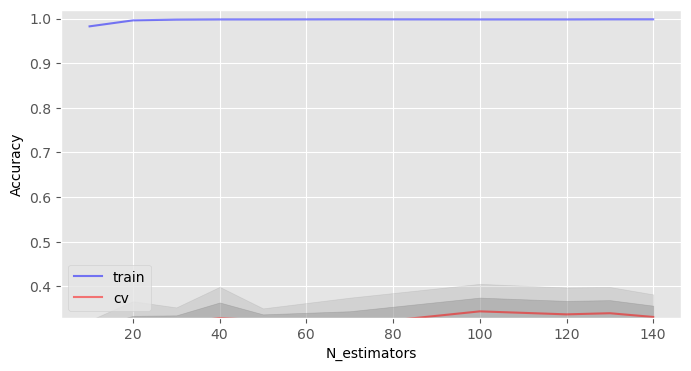

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot( max_n_estimators, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot( max_n_estimators, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between( max_n_estimators, test_acc.mean(axis=1) - test_acc.std(axis=1),
                test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between( max_n_estimators, test_acc.mean(axis=1) - 2*test_acc.std(axis=1),
                test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.33,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

### max_depth parameter tuning

In [ ]:
x_train,tfidf_vect = tfidf(X_train)
x_test = tfidf_vect.transform(X_test)
temp_train_acc = []
temp_test_acc = []
train_acc = []
test_acc = []
max_depth_grid = [ 11, 13, 15, 17, 20, 22, 24,26,28,30]
#max_n_estimators = [30,40,50,70,100,120,130]
skf = StratifiedKFold(n_splits=5,shuffle=True)

for values in max_depth_grid:
    temp_test_acc = []
    temp_train_acc = []
    rf = RandomForestClassifier(n_estimators=70,max_depth = values,n_jobs=-1,random_state=40)
    for train,test in skf.split(x_train,y_train):
        xtrain,xtest = x_train[train],x_train[test]
        ytrain,ytest = y_train.iloc[train],y_train.iloc[test]
        rf.fit(xtrain,ytrain)
        temp_train_acc.append(rf.score(xtrain,ytrain))
        temp_test_acc.append(rf.score(xtest,ytest))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
grid = max_depth_grid 
print("Best CV accuracy is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100,
                                                       grid[np.argmax(test_acc.mean(axis=1))]))        
    

Best CV accuracy is 32.89% with 28 trees


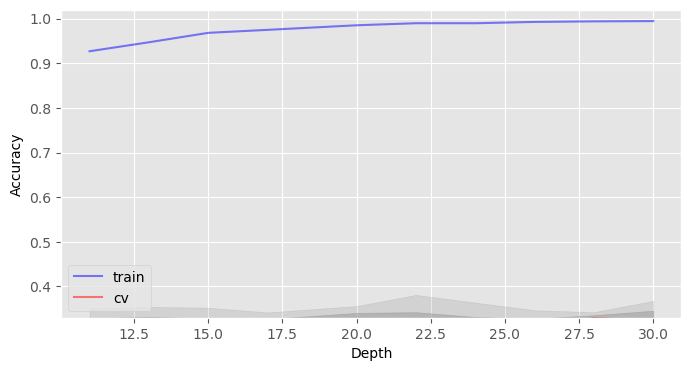

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot( grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between( grid, test_acc.mean(axis=1) - test_acc.std(axis=1),
                test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between( grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1),
                test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.33,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Depth");

In [ ]:
x_train,tfidf_vect = tfidf(X_train)
x_test = tfidf_vect.transform(X_test)
temp_train_acc = []
temp_test_acc = []
train_acc = []
test_acc = []
min_samples_leaf_grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
skf = StratifiedKFold(n_splits=5,shuffle=True)

for values in min_samples_leaf_grid:
    temp_test_acc = []
    temp_train_acc = []
    rf = RandomForestClassifier(n_estimators=70,max_depth =26,min_samples_leaf=values,n_jobs=-1,random_state=40)
    for train,test in skf.split(x_train,y_train):
        xtrain,xtest = x_train[train],x_train[test]
        ytrain,ytest = y_train.iloc[train],y_train.iloc[test]
        rf.fit(xtrain,ytrain)
        temp_train_acc.append(rf.score(xtrain,ytrain))
        temp_test_acc.append(rf.score(xtest,ytest))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
grid = min_samples_leaf_grid
print("Best CV accuracy is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100,
                                                       grid[np.argmax(test_acc.mean(axis=1))]))        

Best CV accuracy is 32.72% with 3 trees


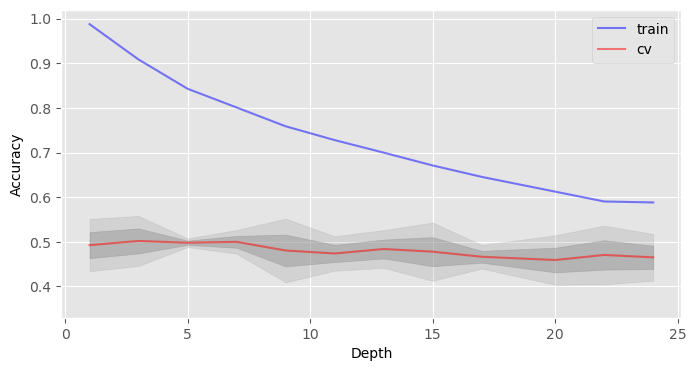

In [64]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot( grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between( grid, test_acc.mean(axis=1) - test_acc.std(axis=1),
                test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between( grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1),
                test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.33,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Depth");

In [69]:
skf = StratifiedKFold(n_splits=5)
params = {'countvectorizer__max_df':[0.3,0.4],
          'countvectorizer__min_df':[0.005,0.1],
          'tfidftransformer__norm':[None],
          #'tfidftransformer__use_idf':[True,False],
          #'tfidftransformer__smooth_idf':[True,False],
          'randomforestclassifier__n_estimators':[68,70,72,74],
          'randomforestclassifier__min_samples_leaf': [1,2,3],
          'randomforestclassifier__max_depth': [18,20,22,24],
          
         }
pipe = make_pipeline(CountVectorizer(max_df=0.2, min_df=0.01, ngram_range=(1,3),stop_words='english'),TfidfTransformer(),RandomForestClassifier())
grid = GridSearchCV(pipe,params,scoring="accuracy",cv = skf,n_jobs=-1,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(max_df=0.2, min_df=0.01,
                                                        ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('tfidftransformer', TfidfTransformer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_df': [0.2, 0.4],
                         'countvectorizer__min_df': [0.005, 0.1],
                         'randomforestclassifier__max_depth': [20, 22, 24, 26],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 3],
                         'randomforestclassifier__n_estimators': [68, 70, 72,
                                                                  74],
                         'tfidftransformer__norm': [None]},
             scoring='accuracy', verbose=3)

In [70]:
grid.best_score_,grid.best_params_

(0.514706800445931,
 {'countvectorizer__max_df': 0.4,
  'countvectorizer__min_df': 0.1,
  'randomforestclassifier__max_depth': 20,
  'randomforestclassifier__min_samples_leaf': 1,
  'randomforestclassifier__n_estimators': 68,
  'tfidftransformer__norm': None})

In [ ]:
pipe = make_pipeline(CountVectorizer(max_df=0.2, min_df=0.01, ngram_range=(1,3),stop_words='english'),TfidfTransformer(),RandomForestClassifier())

In [95]:
SVM = SVC(C=1.2, kernel='linear', degree=3, gamma='auto')
SVM.fit(x_train,y_train)
SVM.score(x_test,y_test)

0.29347826086956524

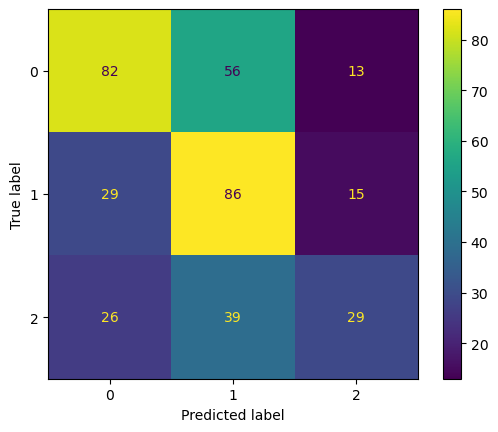

In [55]:
import seaborn as sns 
# Try resetting it 
plt.rcParams['axes.grid'] = False
y_preds = SVM.predict(x_test)
cm = confusion_matrix(y_test,y_preds, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)
plt.show(disp.plot())


In [98]:
skf = StratifiedKFold(n_splits=5)
params = {'countvectorizer__max_df':[0.1,0.4],
          'countvectorizer__min_df':[0.005,0.01],
          'svc__C': np.linspace(0.8,1.5,3),
          'svc__gamma':['auto'] ,
          'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
          'svc__degree' : [2,3,4],
         }
pipe = make_pipeline(CountVectorizer(max_df=0.2, min_df=0.01, ngram_range=(1,3),stop_words='english'),TfidfTransformer(),SVC(degree=3))
grid = GridSearchCV(pipe,params,scoring="accuracy",cv = skf,n_jobs=-1,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(max_df=0.2, min_df=0.01,
                                                        ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('tfidftransformer', TfidfTransformer()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_df': [0.1, 0.4],
                         'countvectorizer__min_df': [0.005, 0.01],
                         'svc__C': array([0.8 , 1.15, 1.5 ]),
                         'svc__degree': [2, 3, 4], 'svc__gamma': ['auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [80]:
grid.best_score_,grid.best_params_

(0.5073333333333334,
 {'countvectorizer__max_df': 0.4,
  'countvectorizer__min_df': 0.005,
  'svc__C': 1.15,
  'svc__degree': 2,
  'svc__gamma': 'auto',
  'svc__kernel': 'linear'})

In [88]:
SGDClassifier?

Init signature:
SGDClassifier(
    loss='hinge',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    n_jobs=None,
    random_state=None,
    learning_rate='optimal',
    eta0=0.0,
    power_t=0.5,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    warm_start=False,
    average=False,
)
Docstring:     
Linear classifiers (SVM, logistic regression, etc.) with SGD training.

This estimator implements regularized linear models with stochastic
gradient descent (SGD) learning: the gradient of the loss is estimated
each sample at a time and the model is updated along the way with a
decreasing strength schedule (aka learning rate). SGD allows minibatch
(online/out-of-core) learning via the `partial_fit` method.
For best results using the default learning rate schedule, the data should
have zero mean and unit variance.



In [66]:
skf = StratifiedKFold(n_splits=5)
params = {'countvectorizer__max_df':[0.1,0.2,0.3,0.4],
          'countvectorizer__min_df':[0.005,0.01,0.03],
          'tfidftransformer__norm':[None],
           'sgdclassifier__alpha': [0.0001,0.001],
           'sgdclassifier__loss': ['hinge', 'log_loss'], 
    #'clf__penalty': ('l2', 'elasticnet'),
          'sgdclassifier__max_iter': [100,200,500],
         }
pipe = make_pipeline(CountVectorizer(ngram_range=(1,3),stop_words='english'),TfidfTransformer(),SGDClassifier())
grid = GridSearchCV(pipe,params,scoring="accuracy",cv = skf,n_jobs=-1,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(ngram_range=(1, 3),
                                                        stop_words='english')),
                                       ('tfidftransformer', TfidfTransformer()),
                                       ('sgdclassifier', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_df': [0.1, 0.2, 0.3, 0.4],
                         'countvectorizer__min_df': [0.005, 0.01, 0.03],
                         'sgdclassifier__alpha': [0.0001, 0.001],
                         'sgdclassifier__loss': ['hinge', 'log_loss'],
                         'sgdclassifier__max_iter': [100, 200, 500],
                         'tfidftransformer__norm': [None]},
             scoring='accuracy', verbose=3)

In [67]:
grid.best_score_,grid.best_params_

(0.33472803347280333,
 {'countvectorizer__max_df': 0.4,
  'countvectorizer__min_df': 0.005,
  'sgdclassifier__alpha': 0.001,
  'sgdclassifier__loss': 'hinge',
  'sgdclassifier__max_iter': 500,
  'tfidftransformer__norm': None})

In [97]:
pipe = make_pipeline(CountVectorizer(max_df=0.2, min_df=0.01, ngram_range=(1,3),stop_words='english'),TfidfTransformer(),SGDClassifier(alpha=0.0001,loss='hinge',max_iter=100))
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.4693333333333333

# Bert

In [21]:
SVC?

Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer or
other :ref:`kernel_approximation`.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")